<a href="https://colab.research.google.com/github/TheHstler/Machine-Learning-Assingment-2/blob/main/ml_diabetes_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment

**Dataset**:       DIABETES


In [436]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

Add imports here as needed.

Remember to **re-run the cell when you add imports**, so it gets loaded into the virtual notebook environment!

In [437]:
# Data and Datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import DBSCAN

# Validation methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# Hyper-parameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Feature selection & feature engineering
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

# Stats
from scipy.stats import randint as sp_randint
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import shapiro     # Shapiro Wilk
from scipy.stats import normaltest  # D’Agostino’s K^2
from scipy.stats import anderson    # Anderson-Darling
from scipy.stats import ttest_ind    # independent student t-test; assumes normality
from scipy.stats import mannwhitneyu # non-parametric; doesn't assume normality

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz

# Utils
import pprint
import numpy as np
from time import time
import openpyxl

## Loading the dataset

In [438]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Two datasets/diabetes_dataset_100k.csv')

# printing out dataset info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34144 entries, 0 to 34143
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 33838 non-null  float64
 1   gender               33844 non-null  object 
 2   age                  33839 non-null  float64
 3   location             33841 non-null  object 
 4   race                 33837 non-null  float64
 5   hypertension         33835 non-null  float64
 6   heart_disease        33838 non-null  float64
 7   smoking_history      33839 non-null  object 
 8   bmi                  33863 non-null  float64
 9   hbA1c_level          27050 non-null  float64
 10  blood_glucose_level  23657 non-null  float64
 11  diabetes             34143 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.1+ MB
None


,year,gender,age,location,race,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020.0,Female,32.0,Alabama,5.0,0.0,0.0,never,27.32,NaN,100.0,0.0
1,2015.0,Female,29.0,Alabama,2.0,0.0,0.0,never,19.95,NaN,90.0,0.0
2,2015.0,Male,18.0,Alabama,5.0,0.0,0.0,never,23.76,4.8,160.0,0.0
3,2015.0,Male,41.0,Alabama,3.0,0.0,0.0,never,27.32,4.0,NaN,0.0
4,2016.0,Female,52.0,Alabama,1.0,0.0,0.0,never,23.75,6.5,NaN,0.0


In [439]:
df.describe()

,year,age,race,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,33838.000000,33839.000000,33837.000000,33835.000000,33838.000000,33863.000000,27050.000000,23657.000000,34143.000000
mean,2018.389473,41.790633,2.989804,0.073533,0.039098,25.962953,5.522732,137.822505,0.085611
std,1.321707,22.449959,1.419860,0.261014,0.193831,8.792323,1.070397,41.082198,0.279792
min,2015.000000,0.080000,1.000000,0.000000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,2.000000,0.000000,0.000000,22.650000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,3.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,59.000000,4.000000,0.000000,0.000000,29.240000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,5.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


## Exploratory data analysis

Section for exploratory data analysis, to address **Tasks 1.1 and 1.2**.

**OBS:** You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle things like missing values and non-numeric data.

**Create more cells as needed!**

In [440]:
# TODO'S: Missing Values? Noise/Outliers? Duplicates?

In [441]:
#To find out missing values
print("Missing Values in the Diabetes Dataset")
print(df.isnull().sum())

Missing Values in the Diabetes Dataset
year                     306
gender                   300
age                      305
location                 303
race                     307
hypertension             309
heart_disease            306
smoking_history          305
bmi                      281
hbA1c_level             7094
blood_glucose_level    10487
diabetes                   1
dtype: int64


Noise in Dataset


<Axes: >

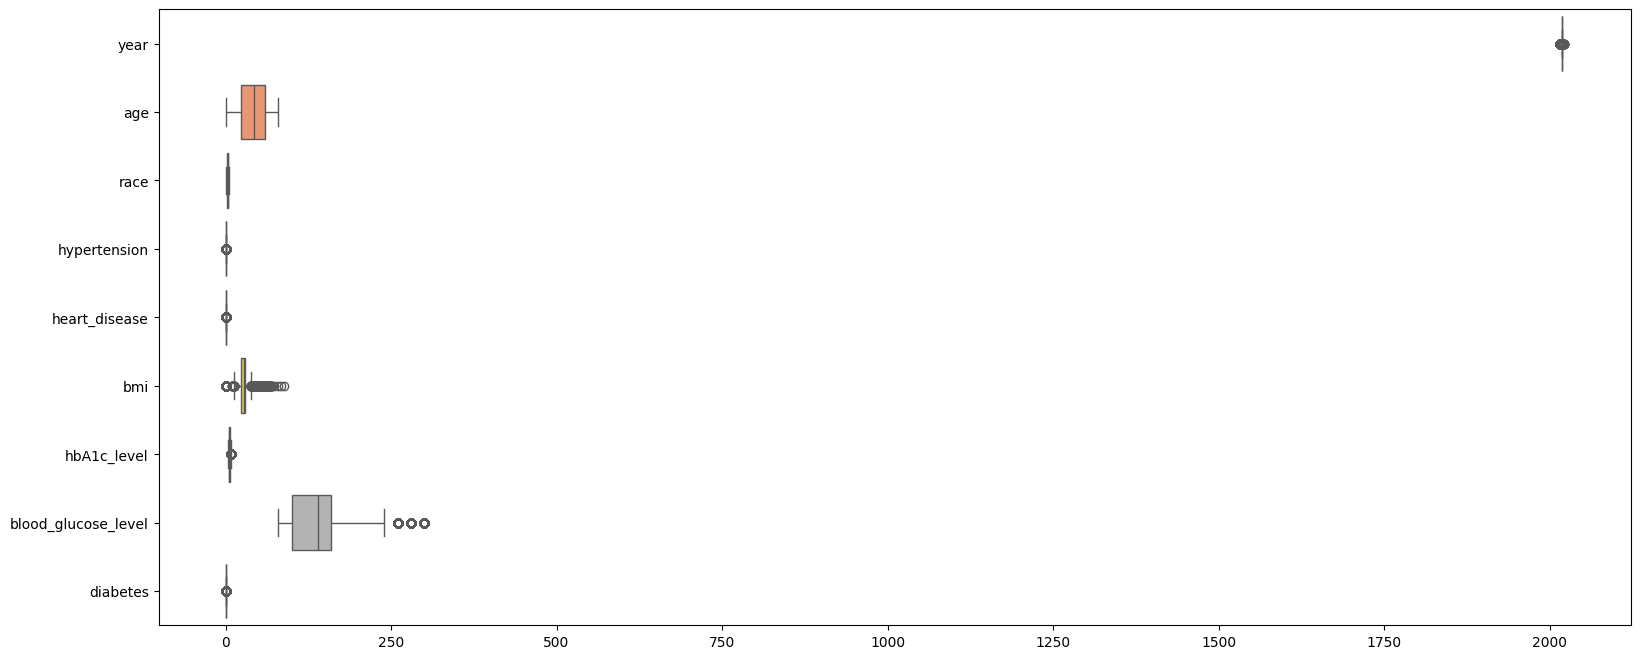

In [442]:
#To find out if there is any noise or Outliers
import seaborn as sns

# Set the figure size
plt.figure(figsize=(19, 8))

print("Noise in Dataset")
sns.boxplot (data=df, orient="h", palette="Set2")

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


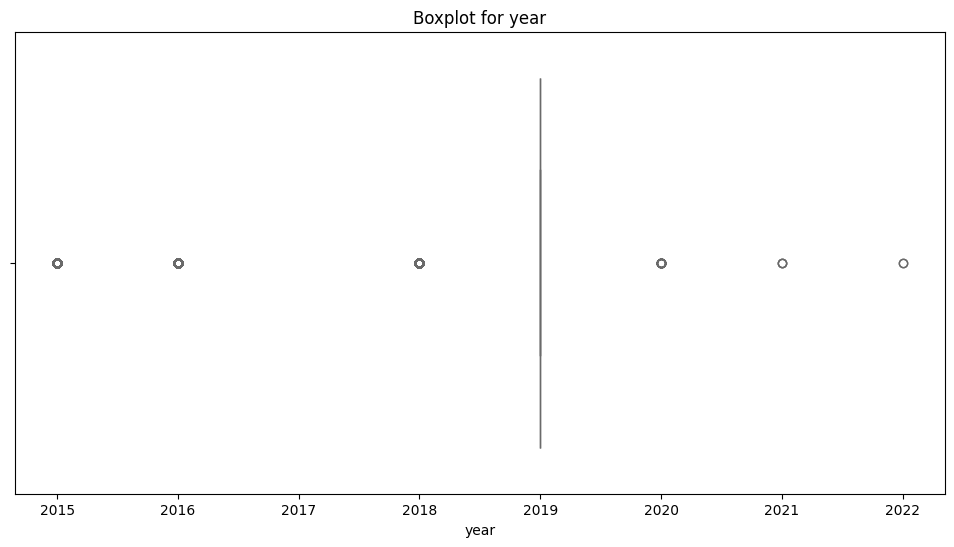

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


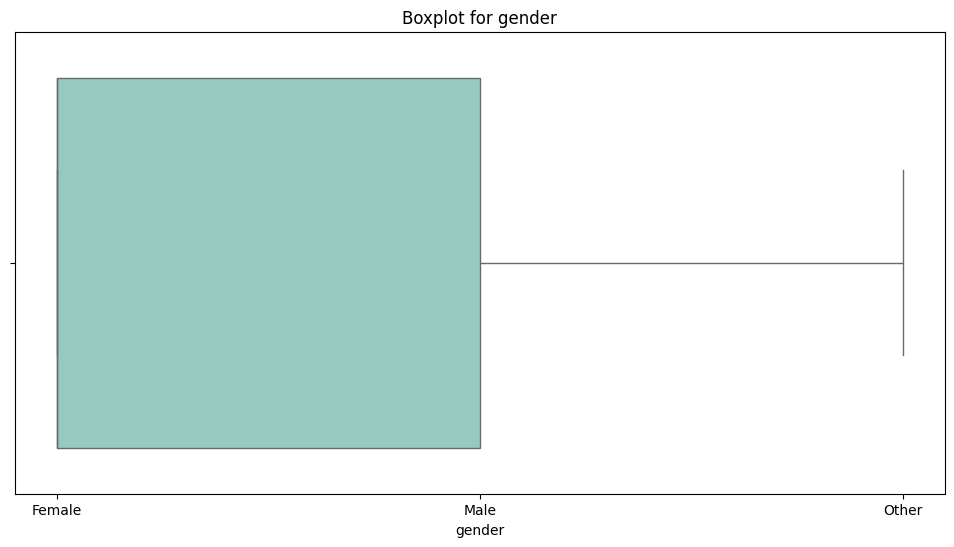

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


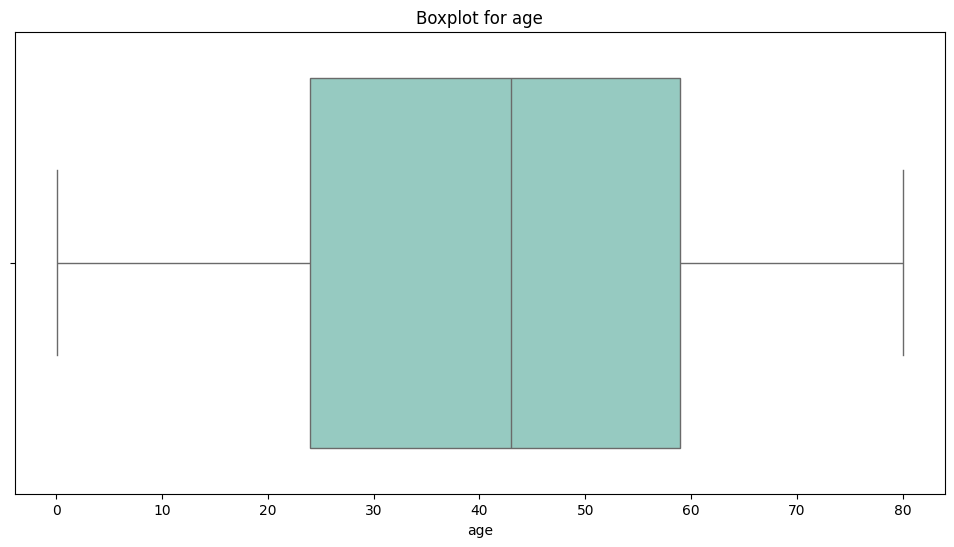

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


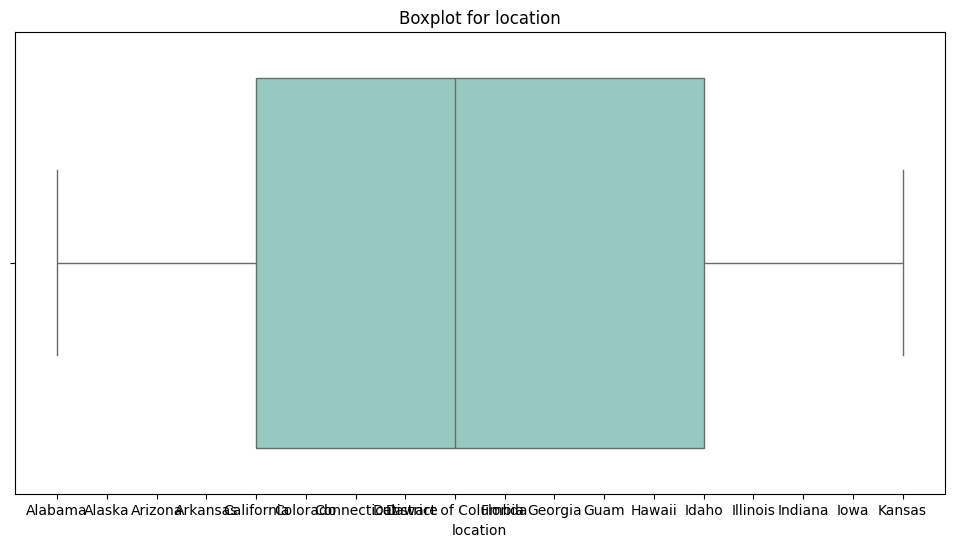

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


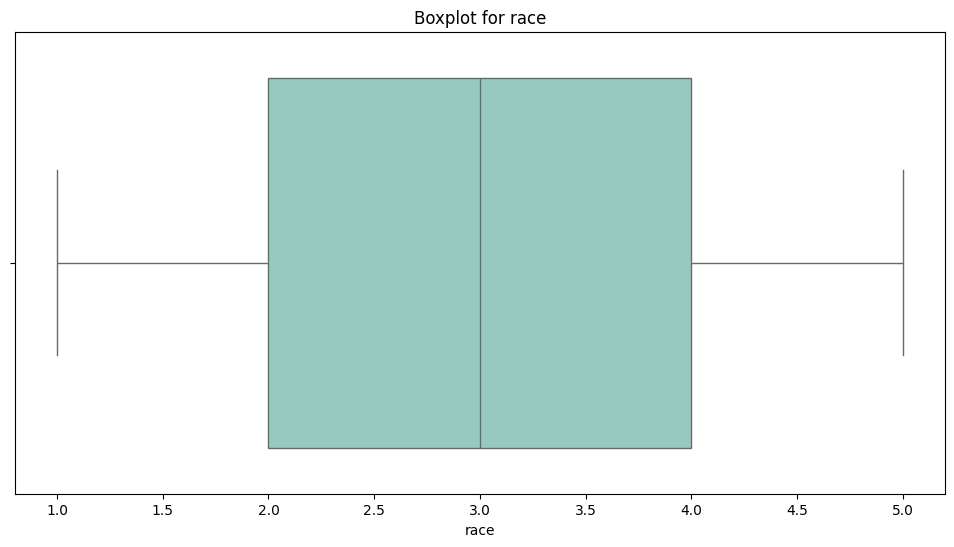

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


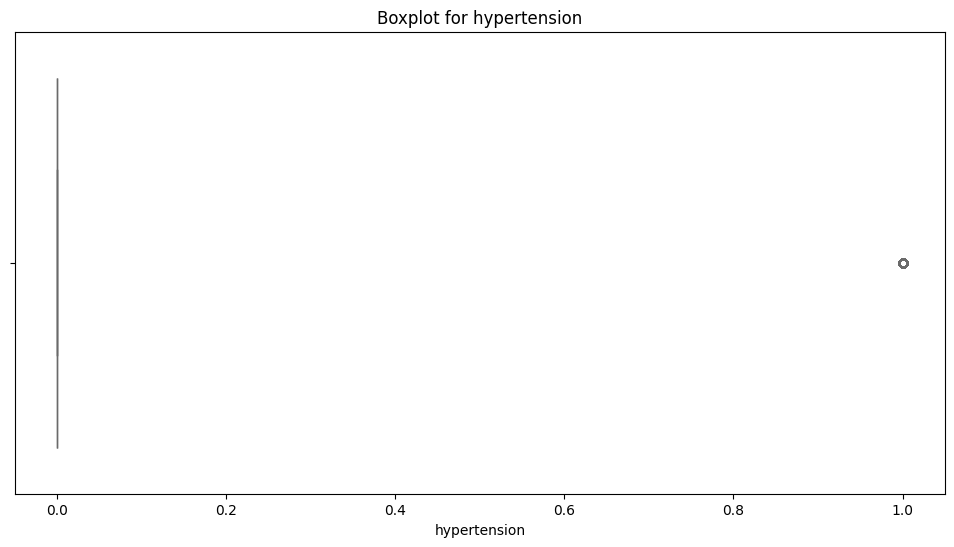

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


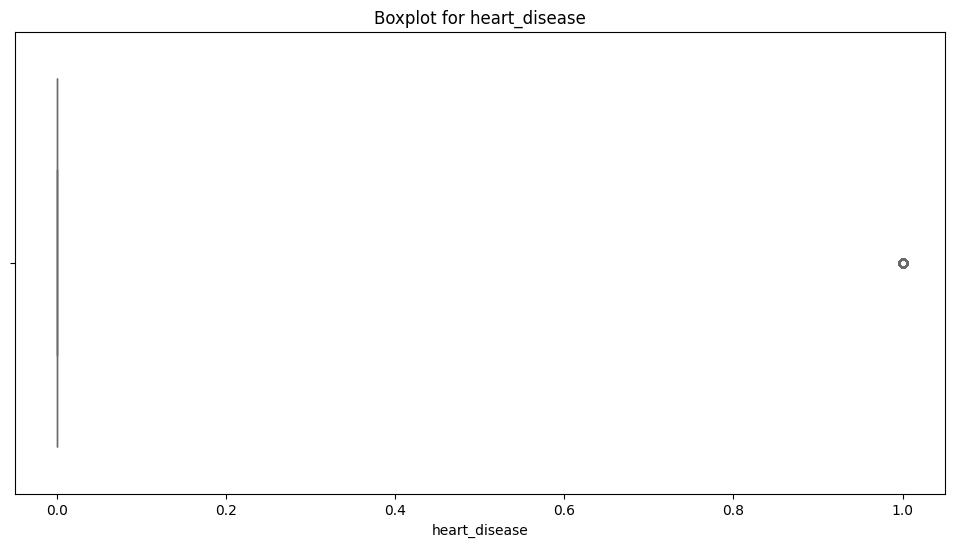

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


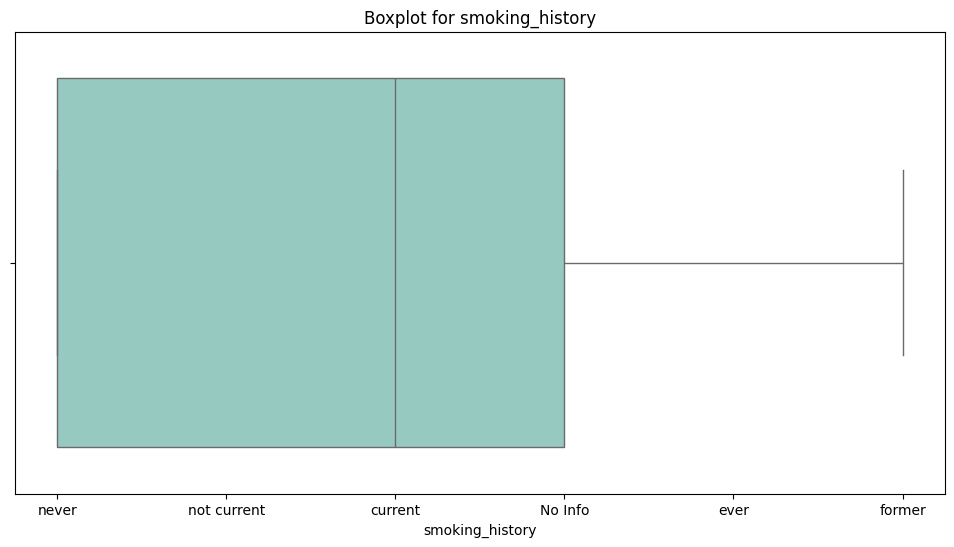

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


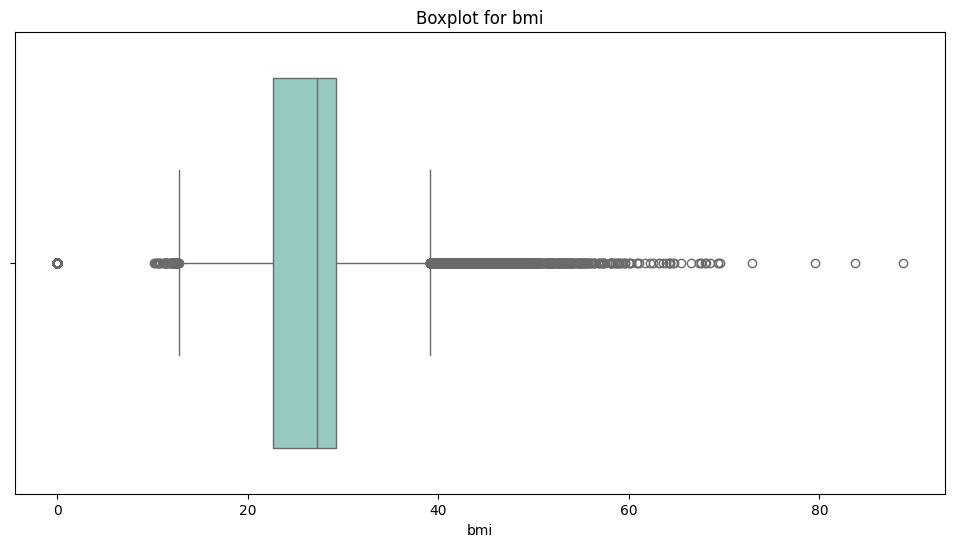

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


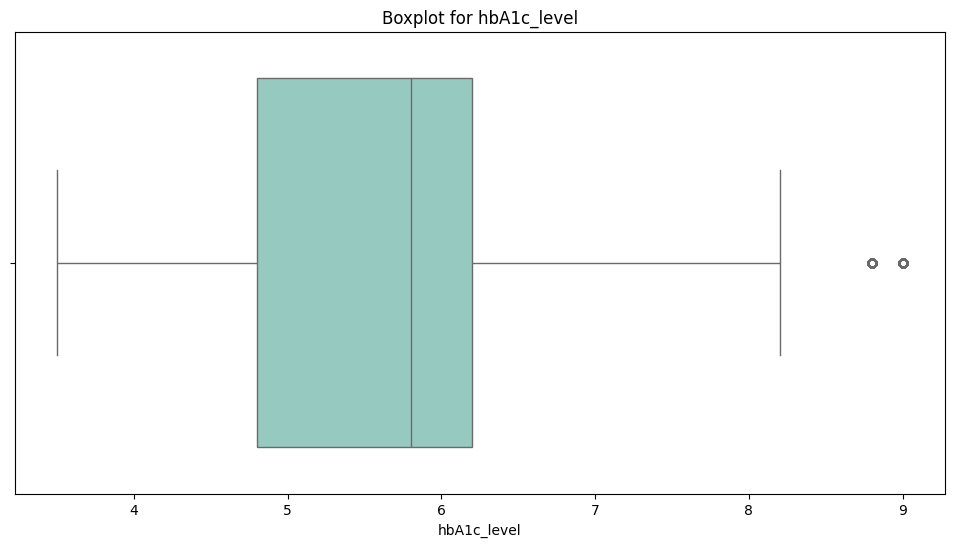

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


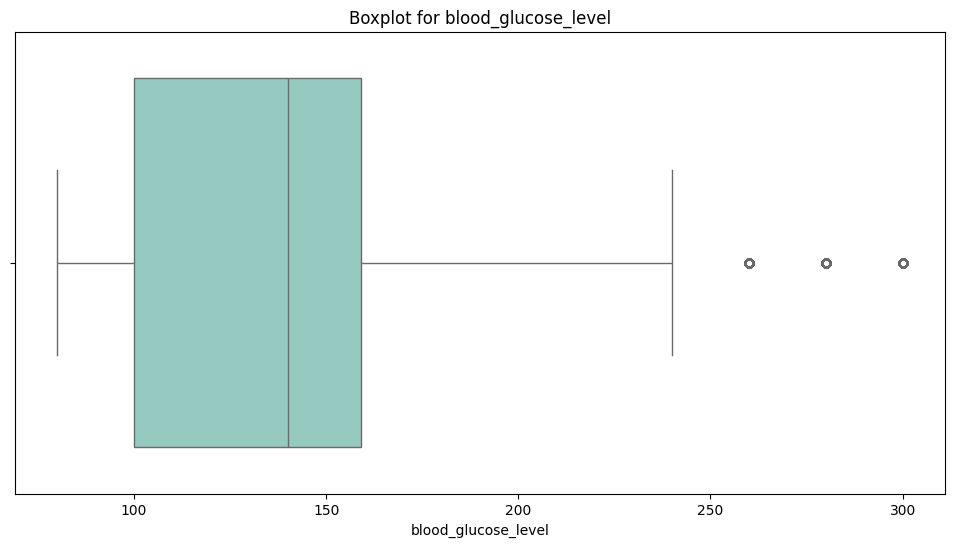

<ipython-input-443-7449fd33b0f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set3")


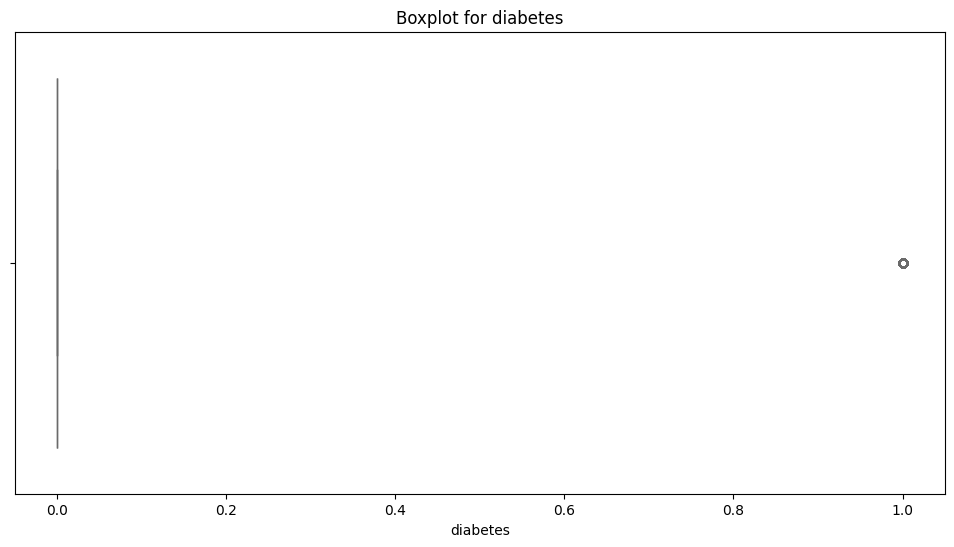

In [443]:
# Loop through each feature (column) in the dataframe
for column in df.columns:
    plt.figure(figsize=(12, 6))  # Optional: Adjust the size of the plot
    sns.boxplot(data=df, x=column, palette="Set3")
    plt.title(f"Boxplot for {column}")  # Title for each boxplot
    plt.show()  # Display the boxplot

In [444]:
df.duplicated().value_counts()

,count
False,33963
True,181


In [445]:
#What rows are the duplicates from?
df.loc[df.duplicated,:]

,year,gender,age,location,race,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
1273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1348,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33332,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
33506,2019.0,Male,13.0,Iowa,2.0,0.0,0.0,No Info,27.32,4.8,160.0,0.0
33978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
34098,NaN,NaN,NaN,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [446]:
# Count the occurrences of each weather condition
diabetes_counts = df['diabetes'].value_counts()

print("Class balance for 'diabetes' column:")
print(diabetes_counts)

Class balance for 'diabetes' column:
diabetes
0.0    31220
1.0     2923
Name: count, dtype: int64


([<matplotlib.axis.XTick at 0x79e2c96caf90>,
 [Text(0, 0, 'No Diabetes (0)'), Text(1, 0, 'Diabetes (1)')])

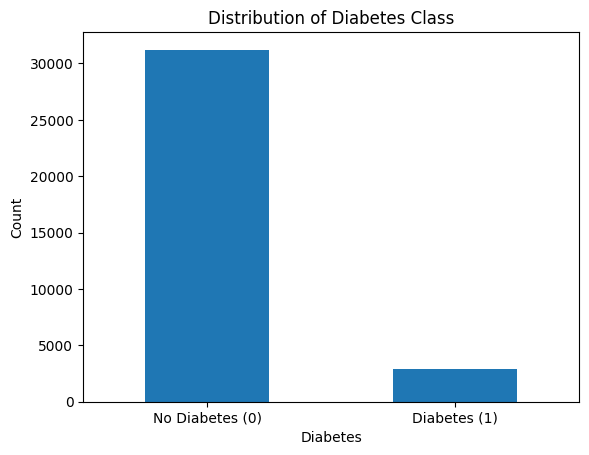

In [447]:
# a bar chart for the 'class' distribution
df['diabetes'].value_counts().plot(kind='bar', title='Distribution of Diabetes Class');
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'], rotation=0)

## Task 2.1 - ML Workflow to Critically Evaluate

In [448]:
# Dropping all rows with missing values
df = df.dropna()

# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18880 entries, 2 to 34141
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 18880 non-null  float64
 1   gender               18880 non-null  int8   
 2   age                  18880 non-null  float64
 3   location             18880 non-null  int8   
 4   race                 18880 non-null  float64
 5   hypertension         18880 non-null  float64
 6   heart_disease        18880 non-null  float64
 7   smoking_history      18880 non-null  int8   
 8   bmi                  18880 non-null  float64
 9   hbA1c_level          18880 non-null  float64
 10  blood_glucose_level  18880 non-null  float64
 11  diabetes             18880 non-null  float64
dtypes: float64(9), int8(3)
memory usage: 1.5 MB


<ipython-input-448-86b759a4abdb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type


In [449]:
# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

# Splitting dataset for hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, # feature matrix
                                                    y, # label vector
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=None
                                                   )

# Creating and testing a Logistic Regression Model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Testing the model
y_pred = model.predict(X_test)

# Printing out confusion matrix and accuracy
print(metrics.confusion_matrix(y_test, y_pred))
print("\nAccuracy (Testing):  %0.2f " % (metrics.accuracy_score(y_test, y_pred)))

[[3414   28]
 [ 139  195]]

Accuracy (Testing):  0.96 


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Task 2.3 - Evaluation of Improved ML Workflow

Add code for running your **improved** machine learning experiments below.


In [450]:
# Loading the dataset again, for you to do your own pre-processing (instead of what was done above)
df = pd.read_csv('drive/MyDrive/Two datasets/diabetes_dataset_100k.csv')

In [451]:
df.describe()

,year,age,race,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,33838.000000,33839.000000,33837.000000,33835.000000,33838.000000,33863.000000,27050.000000,23657.000000,34143.000000
mean,2018.389473,41.790633,2.989804,0.073533,0.039098,25.962953,5.522732,137.822505,0.085611
std,1.321707,22.449959,1.419860,0.261014,0.193831,8.792323,1.070397,41.082198,0.279792
min,2015.000000,0.080000,1.000000,0.000000,0.000000,0.000000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,2.000000,0.000000,0.000000,22.650000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,3.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,59.000000,4.000000,0.000000,0.000000,29.240000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,5.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [452]:
# EDA for the diabetes dataset
print("Missing Values in the Diabetes Dataset")
print(df.isnull().sum())

Missing Values in the Diabetes Dataset
year                     306
gender                   300
age                      305
location                 303
race                     307
hypertension             309
heart_disease            306
smoking_history          305
bmi                      281
hbA1c_level             7094
blood_glucose_level    10487
diabetes                   1
dtype: int64


In [453]:
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"\nTotal rows with missing values: {rows_with_missing}")


Total rows with missing values: 15264


<Axes: ylabel='Missing Values'>

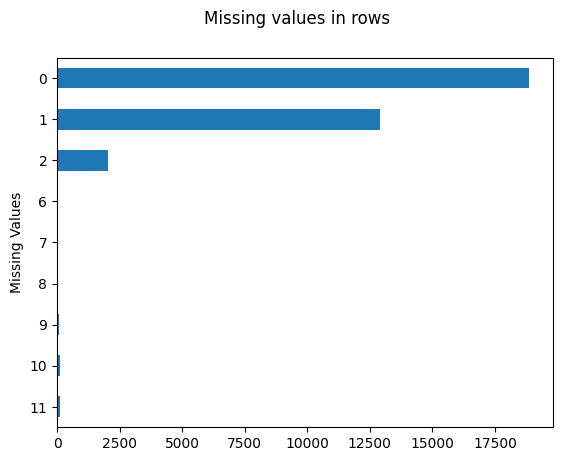

In [454]:
plt.figure()
plt.suptitle('Missing values in rows')
#plt.ylabel('Frequency')
plt.ylabel('Missing Values')
plt.xlabel('Rows')
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False).plot(kind="barh")

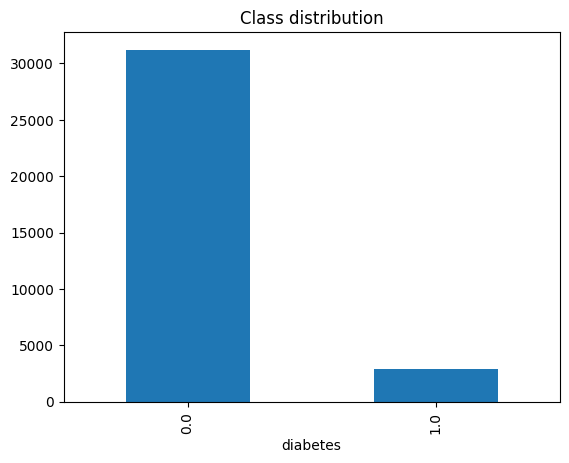

In [455]:
# a bar chart for the 'class' distribution
df['diabetes'].value_counts().plot(kind='bar', title='Class distribution');

Noise in Dataset


<Axes: >

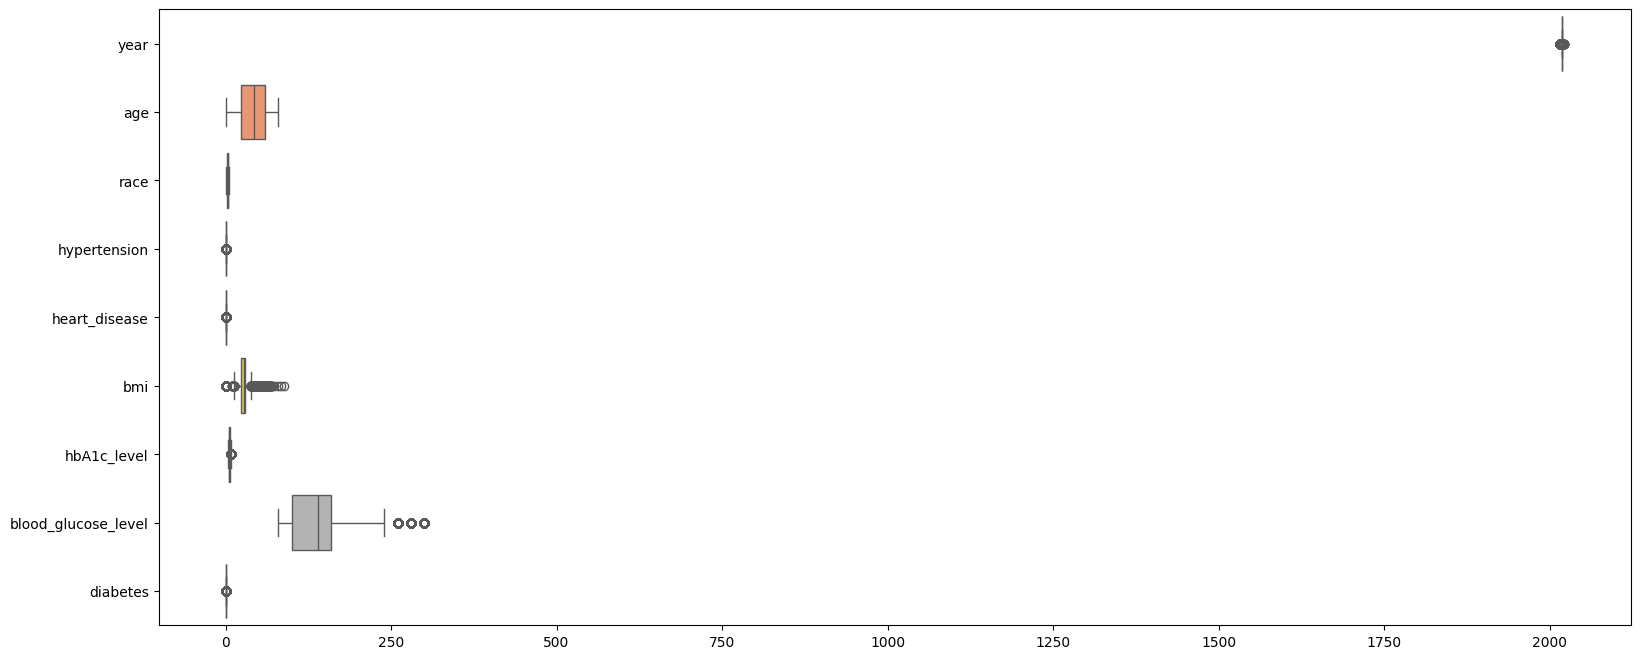

In [456]:
#To find out if there is any noise or Outliers
import seaborn as sns

# Set the figure size
plt.figure(figsize=(19, 8))

print("Noise in Dataset")
sns.boxplot (data=df, orient="h", palette="Set2")

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


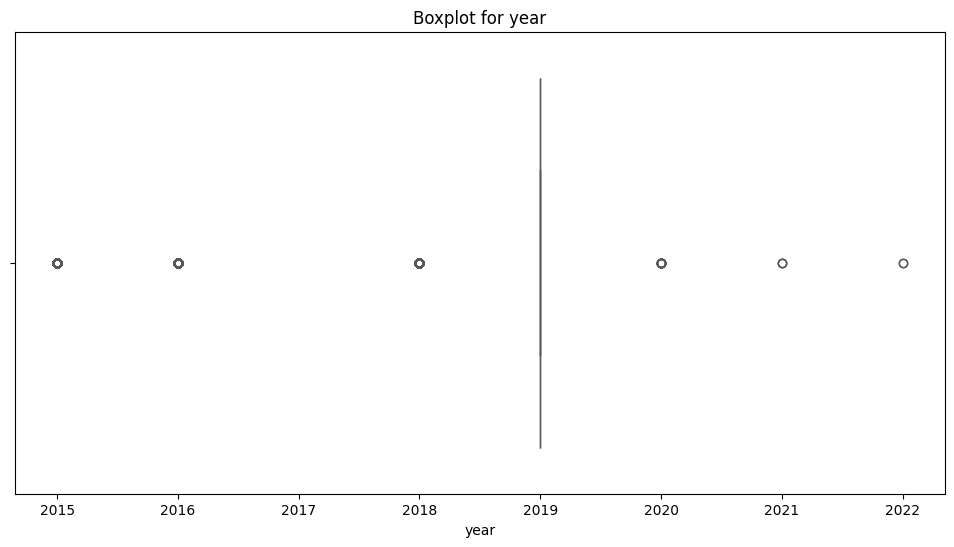

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


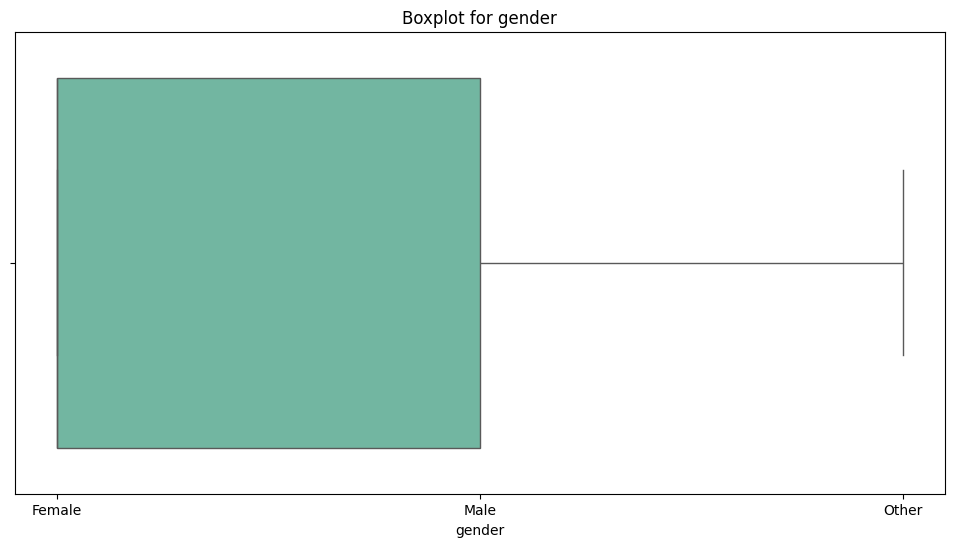

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


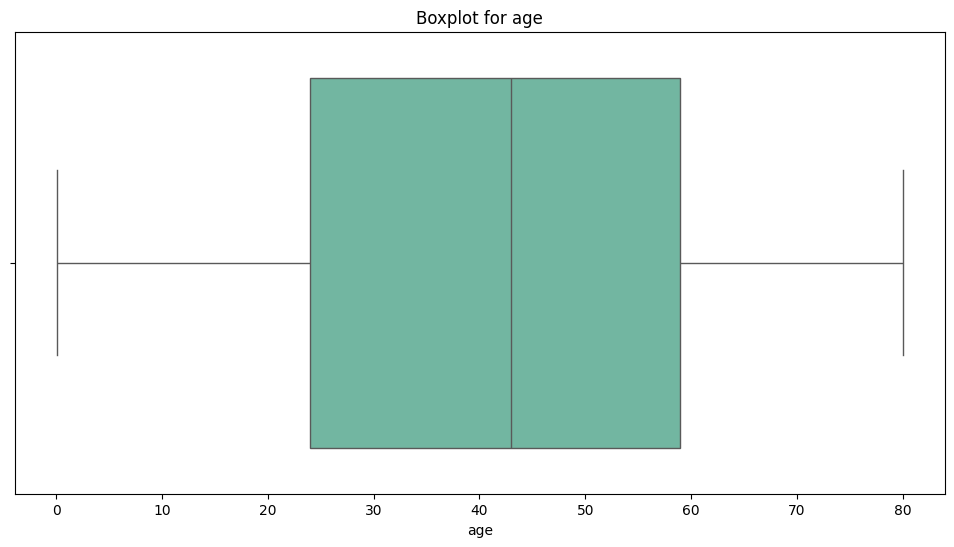

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


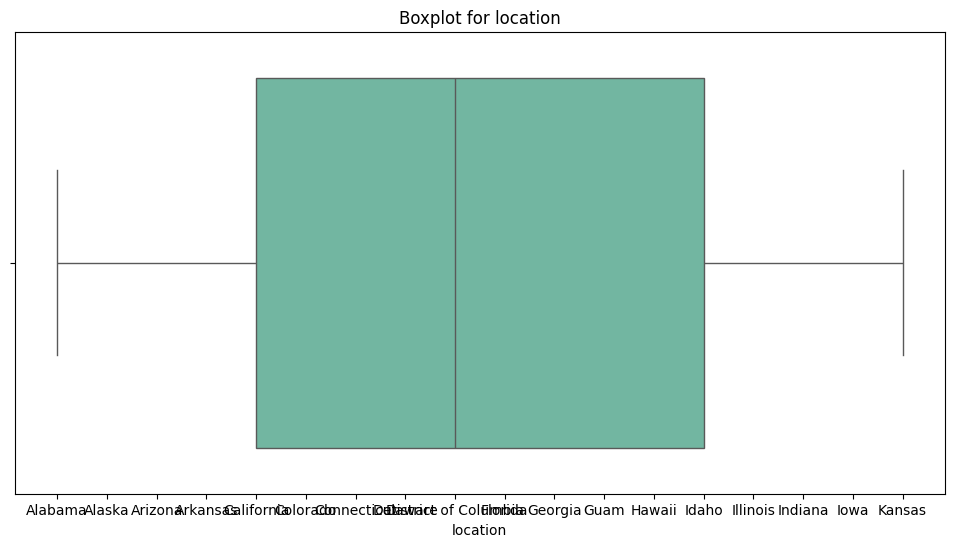

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


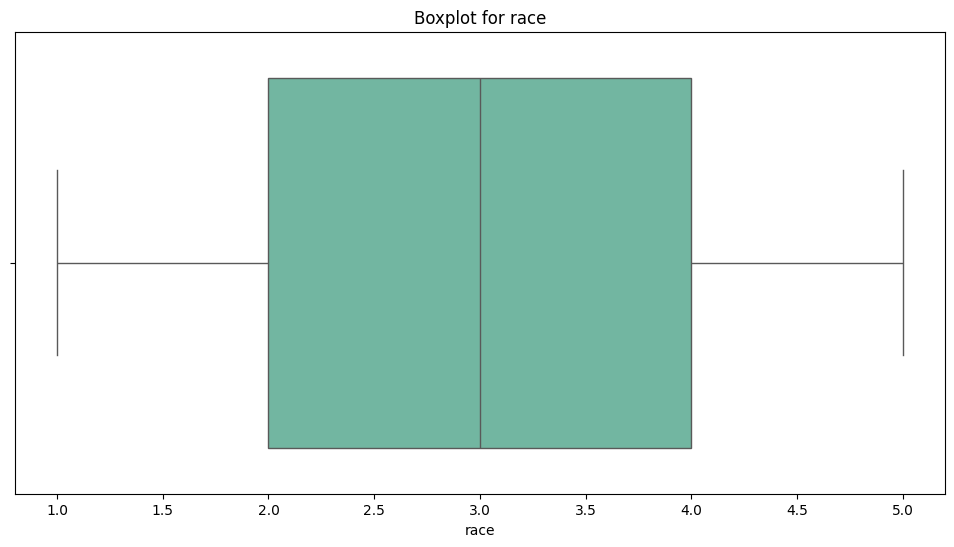

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


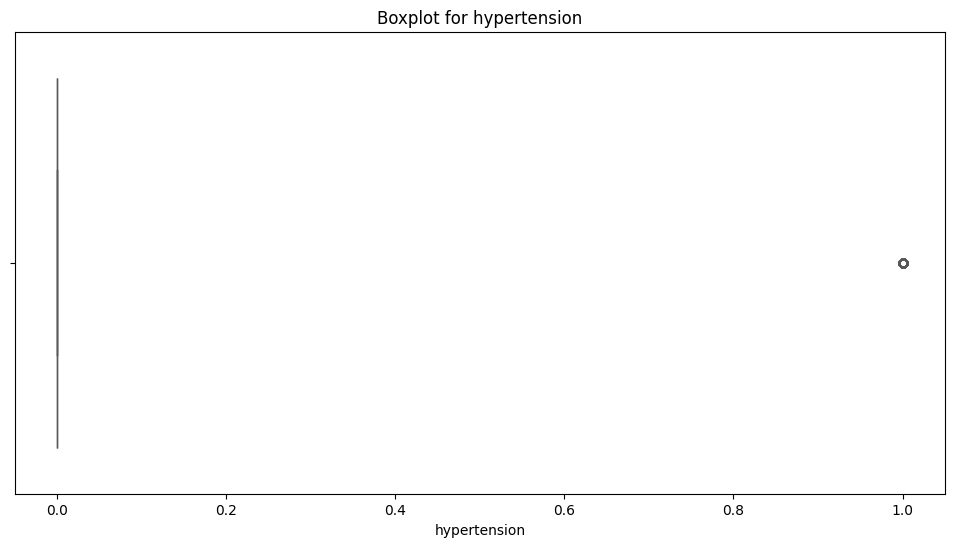

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


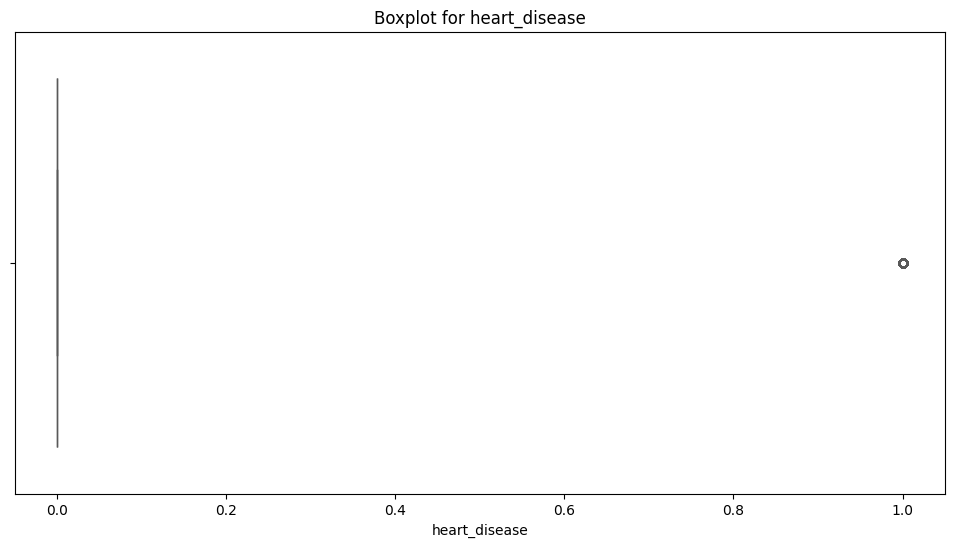

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


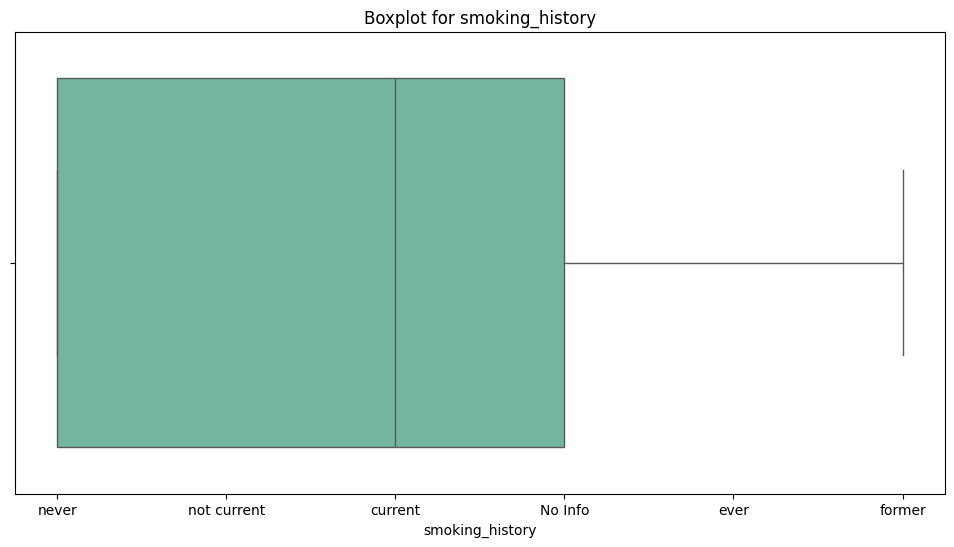

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


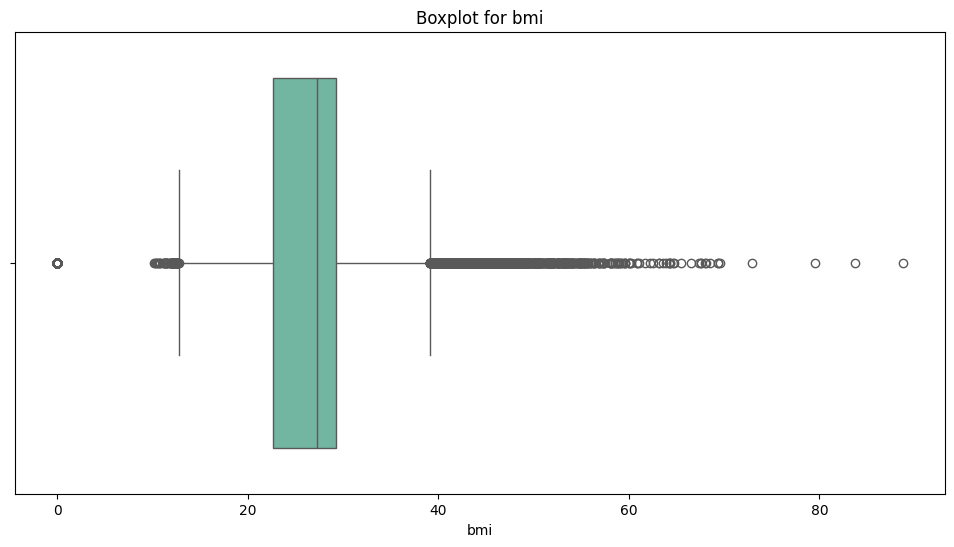

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


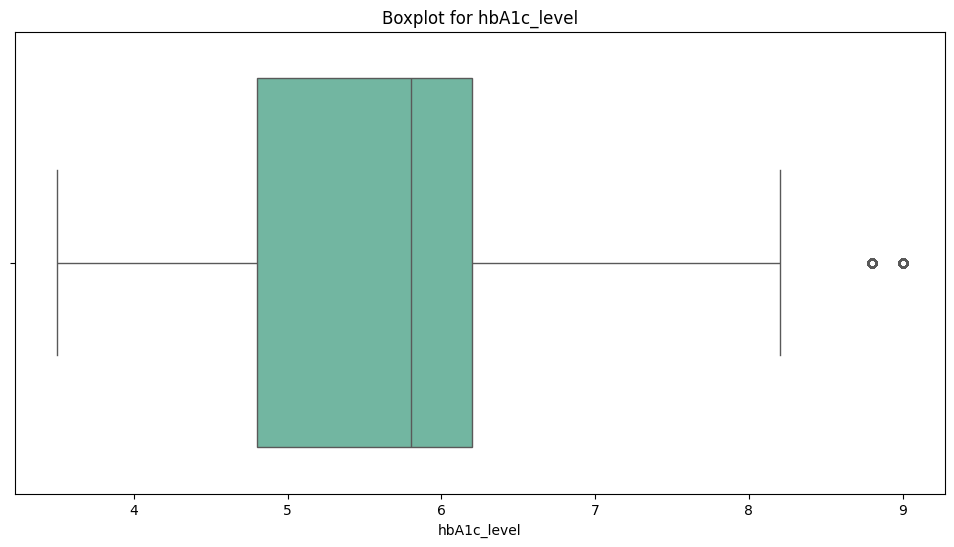

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


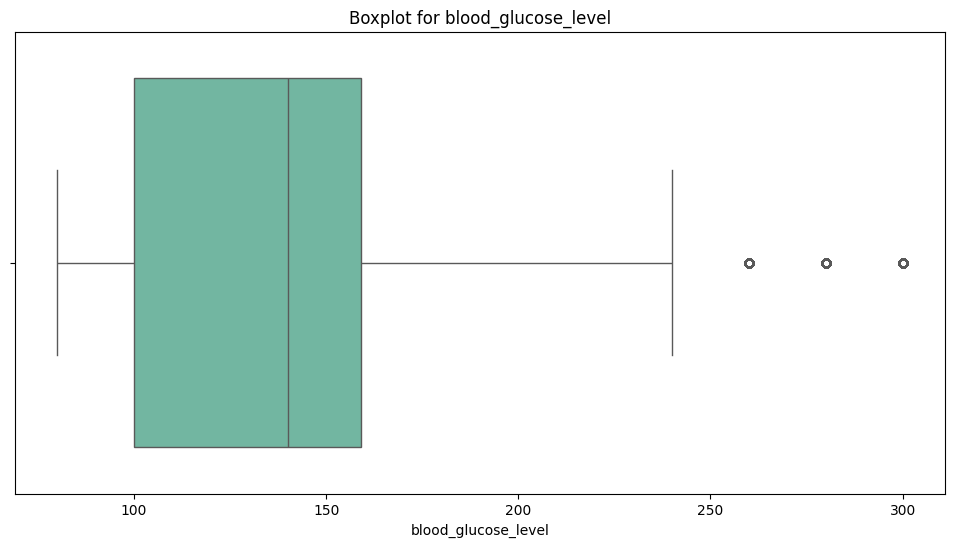

<ipython-input-457-7daa367fc563>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, palette="Set2")


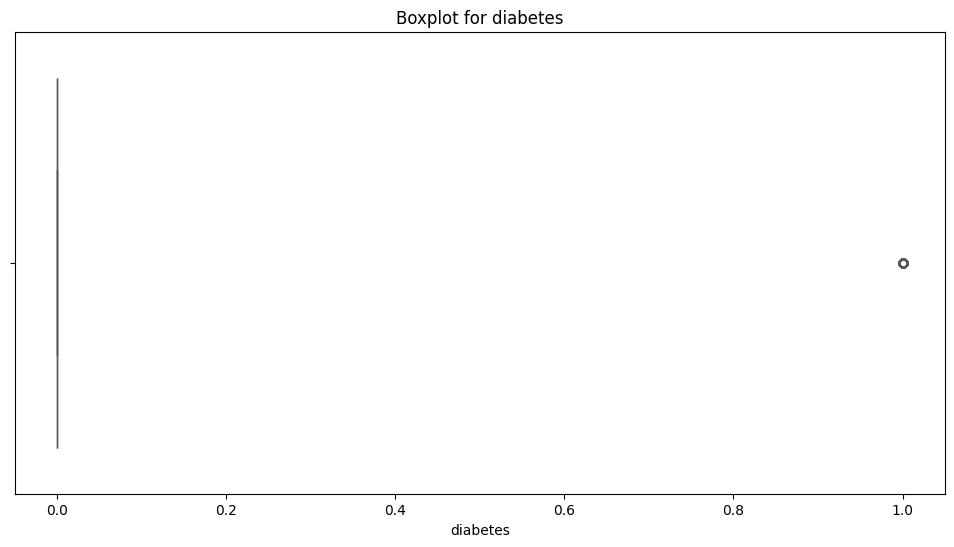

In [457]:
# Loop through each feature (column) in the dataframe
for column in df.columns:
    plt.figure(figsize=(12, 6))  # Optional: Adjust the size of the plot
    sns.boxplot(data=df, x=column, palette="Set2")
    plt.title(f"Boxplot for {column}")  # Title for each boxplot
    plt.show()  # Display the boxplot

In [458]:
# Create a copy of the original dataset
df_copy = df.copy()

# Now working on df_copy
df_copy = df_copy[df_copy.isnull().sum(axis=1) <= 3]

# Check for missing values after processing
print(df_copy.isnull().sum())

# Original dataset still has the missing values
print(df.isnull().sum())


year                       0
gender                     0
age                        0
location                   0
race                       0
hypertension               0
heart_disease              0
smoking_history            0
bmi                        0
hbA1c_level             6786
blood_glucose_level    10163
diabetes                   1
dtype: int64
year                     306
gender                   300
age                      305
location                 303
race                     307
hypertension             309
heart_disease            306
smoking_history          305
bmi                      281
hbA1c_level             7094
blood_glucose_level    10487
diabetes                   1
dtype: int64


In [459]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the missing data percentage for each column
print(missing_percentage)

year                    0.896204
gender                  0.878632
age                     0.893276
location                0.887418
race                    0.899133
hypertension            0.904991
heart_disease           0.896204
smoking_history         0.893276
bmi                     0.822985
hbA1c_level            20.776710
blood_glucose_level    30.714035
diabetes                0.002929
dtype: float64


In [460]:
# Count total rows
total_rows = len(df)

# Count rows with more than 3 missing values
rows_to_remove = len(df[df.isnull().sum(axis=1) > 3])

print(f"Total rows: {total_rows}")
print(f"Rows with more than 3 missing values: {rows_to_remove}")
print(f"Percentage of data that would be removed: {rows_to_remove/total_rows*100:.2f}%")

Total rows: 34144
Rows with more than 3 missing values: 339
Percentage of data that would be removed: 0.99%


## Dealing with Missing Data

In [461]:
# Remove rows with more than 5 missing values
threshold_count = 5

# the 'null' count for every row
df_row_null_count = df.isnull().sum(axis=1)

#Drop any rows that reach it
df = df.drop(df_row_null_count[df_row_null_count >= threshold_count].index,axis=0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33805 entries, 0 to 34143
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 33805 non-null  float64
 1   gender               33805 non-null  object 
 2   age                  33805 non-null  float64
 3   location             33805 non-null  object 
 4   race                 33805 non-null  float64
 5   hypertension         33805 non-null  float64
 6   heart_disease        33805 non-null  float64
 7   smoking_history      33805 non-null  object 
 8   bmi                  33805 non-null  float64
 9   hbA1c_level          27019 non-null  float64
 10  blood_glucose_level  23642 non-null  float64
 11  diabetes             33804 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.4+ MB


In [462]:
#Fill features missing values with the mean
df['age'] = df['age'].fillna((df['age'].mean()))
df['year'] = df['year'].fillna((df['year'].mean()))
df['hbA1c_level'] = df['hbA1c_level'].fillna((df['hbA1c_level'].mean()))
df['blood_glucose_level'] = df['blood_glucose_level'].fillna((df['blood_glucose_level'].mean()))

df['bmi'] = df['bmi'].fillna((df['bmi'].median()))

df['hypertension'] = df['hypertension'].fillna((df['hypertension'].mode()))
df['heart_disease'] = df['heart_disease'].fillna((df['heart_disease'].mode()))
df['race'] = df['race'].fillna((df['race'].mode()))
df['diabetes'] = df['diabetes'].fillna((df['diabetes'].mode()))[0]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33805 entries, 0 to 34143
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 33805 non-null  float64
 1   gender               33805 non-null  object 
 2   age                  33805 non-null  float64
 3   location             33805 non-null  object 
 4   race                 33805 non-null  float64
 5   hypertension         33805 non-null  float64
 6   heart_disease        33805 non-null  float64
 7   smoking_history      33805 non-null  object 
 8   bmi                  33805 non-null  float64
 9   hbA1c_level          33805 non-null  float64
 10  blood_glucose_level  33805 non-null  float64
 11  diabetes             33805 non-null  float64
dtypes: float64(9), object(3)
memory usage: 4.4+ MB


In [463]:
df.duplicated().value_counts()

,count
False,33797
True,8


In [464]:
#What rows are the duplicates from?
df.loc[df.duplicated,:]

,year,gender,age,location,race,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
10666,2019.0,Male,68.0,Colorado,2.0,0.0,0.0,No Info,27.32,5.522751,90.000000,0.0
13328,2019.0,Male,80.0,Connecticut,1.0,0.0,0.0,No Info,27.32,5.522751,137.823915,0.0
21662,2019.0,Male,65.0,Georgia,2.0,0.0,0.0,No Info,27.32,4.000000,90.000000,0.0
22203,2019.0,Female,3.0,Georgia,1.0,0.0,0.0,No Info,27.32,5.000000,137.823915,0.0
29119,2019.0,Female,47.0,Illinois,2.0,0.0,0.0,No Info,27.32,6.000000,137.823915,0.0
29391,2019.0,Female,22.0,Illinois,3.0,0.0,0.0,No Info,27.32,5.522751,137.823915,0.0
31175,2019.0,Female,26.0,Indiana,3.0,0.0,0.0,No Info,27.32,5.522751,137.823915,0.0
33506,2019.0,Male,13.0,Iowa,2.0,0.0,0.0,No Info,27.32,4.800000,160.000000,0.0


In [465]:
df = df.drop_duplicates()

## Label-Encoding

In [466]:
# Converting all non-numeric (object) features to numeric
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33797 entries, 0 to 34143
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 33797 non-null  float64
 1   gender               33797 non-null  int8   
 2   age                  33797 non-null  float64
 3   location             33797 non-null  int8   
 4   race                 33797 non-null  float64
 5   hypertension         33797 non-null  float64
 6   heart_disease        33797 non-null  float64
 7   smoking_history      33797 non-null  int8   
 8   bmi                  33797 non-null  float64
 9   hbA1c_level          33797 non-null  float64
 10  blood_glucose_level  33797 non-null  float64
 11  diabetes             33797 non-null  float64
dtypes: float64(9), int8(3)
memory usage: 2.7 MB


<ipython-input-466-e4795d68eba4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.astype('category')) # converting 'object' columns to 'category' type
<ipython-input-466-e4795d68eba4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes) # converting the 'category' columns to integer encoded values


## Dealing with Class Imbalance

<Axes: xlabel='diabetes'>

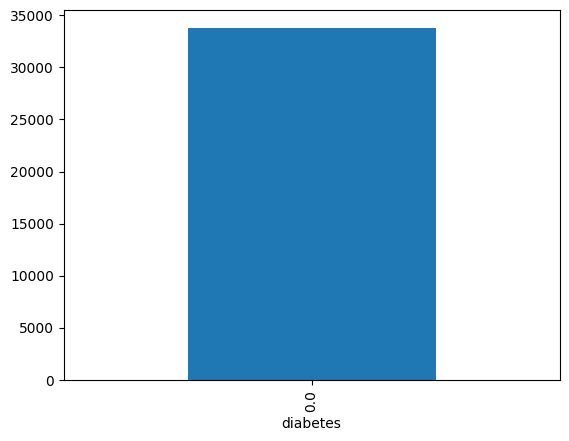

In [467]:
#Class Balance Before
df['diabetes'].value_counts().plot(kind='bar')

In [468]:
from imblearn.over_sampling import SMOTE

# applying SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<Axes: xlabel='diabetes'>

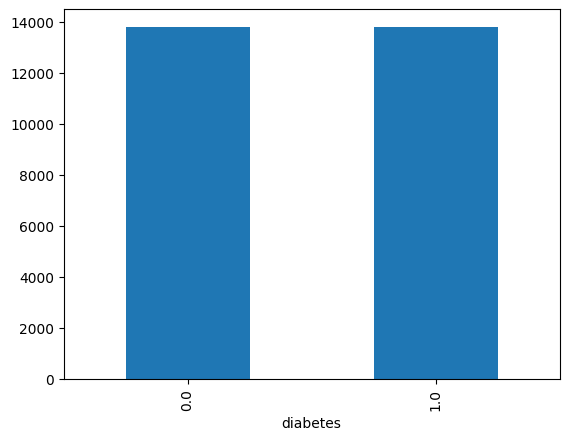

In [469]:
#Class Balance After
y_train_smote.value_counts().plot(kind='bar')

###ML Validation

In [470]:
# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]